# Generate Synthetic Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [102]:
def generate_data(n=50, noise = 5.0):
    np.random.seed(42)
    X = np.linspace(-10, 10, n)
    solpe = 3
    intercept = 8
    noise = np.random.randn(n)*noise
    y = solpe * X + intercept + noise
    return X, y

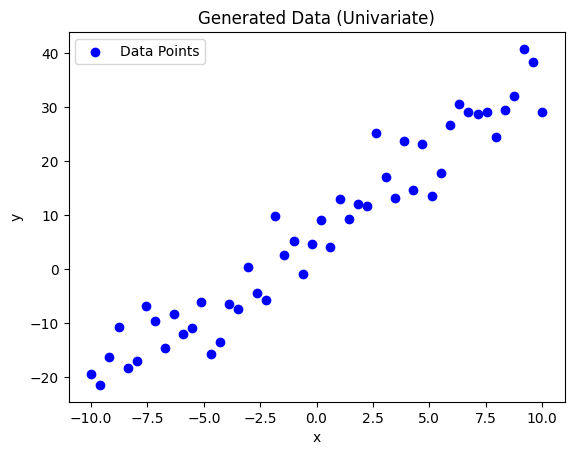

In [103]:
X, y = generate_data()
plt.scatter(X, y, color='blue', label='Data Points')
plt.title("Generated Data (Univariate)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Analytical Method

In [104]:
def param_selection(n=50, X=None, Y=None):
    w_1 = float((n*np.sum(X*Y) - np.sum(X)*np.sum(Y) )/(n*np.sum(X**2) - np.sum(X)**2))
    w_0 = float((np.sum(Y)- w_1*np.sum(X))/n)
    return w_0, w_1
def h(w_0, w_1, X):
    return w_0 + w_1*X

In [105]:
X, Y = generate_data()

In [106]:
w_0, w_1 = param_selection(X=X, Y=Y)

In [107]:
w_0, w_1

(6.8726304737193, 2.8550415012704433)

In [108]:
y_pred = h(w_0 = w_0, w_1 = w_1, X = X)

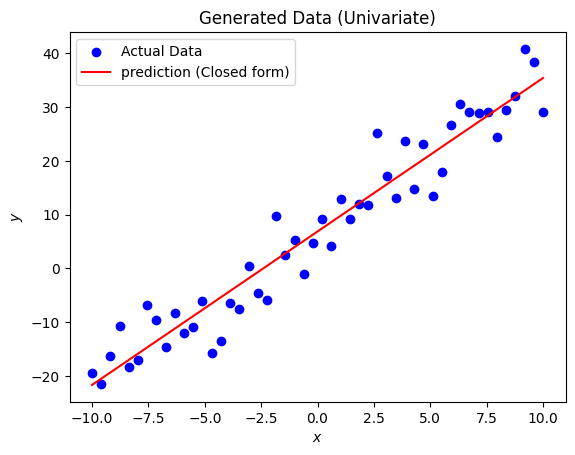

In [109]:
plt.scatter(X, Y, c='b', label = 'Actual Data')
plt.plot(X, y_pred, c='r', label = 'prediction (Closed form)')
plt.legend()
plt.title("Generated Data (Univariate)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

# pseudo-inverse of the matrix (X)

In [114]:
def linear_regression_closed_form(X, y):
    # Adding bias term (x_0 = 1) to input vector X
    X_b = np.c_[np.ones((len(X), 1)), X]  # X_b is now the full input vector with bias term
    # Closed-form solution: w = (X^T * X)^-1 * X^T * y
    w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return w

# Get parameter vector w
w = linear_regression_closed_form(X, y)
print(f"Parameters (w): ")
print(f"w_1 = {w[1]:.2f}, w_0 = {w[0]:.2f}")

Parameters (w): 
w_1 = 2.86, w_0 = 6.87


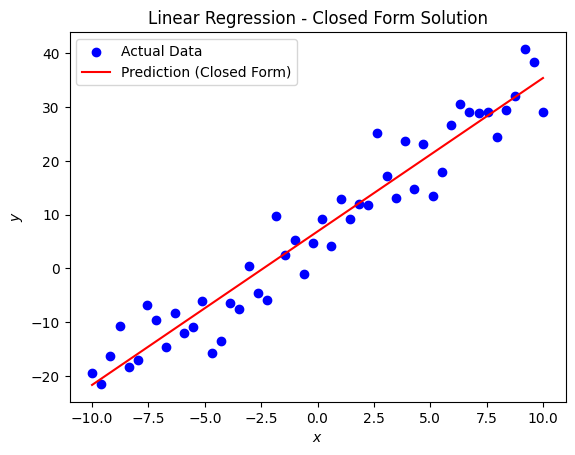

In [117]:
y_pred = h(w[0], w[1], X)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Prediction (Closed Form)')
plt.title("Linear Regression - Closed Form Solution")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()